# got the data from Kaggle

In [1]:
# Importing the required libraries 
import numpy as np 
import pandas as pd 
from collections import Counter
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import Dataset
df = pd.read_excel (r'C:\Users\ParsaRz\Desktop\assignment 2 ML\SupermarketBranches.xlsx')
print(df.shape)
df.head()

(50, 5)


,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# convert the numbers to thousands
for c in ('Advertisement Spend', 'Promotion Spend', 'Administration Spend', 'Profit'):
    df[c] = df[c] / 10000

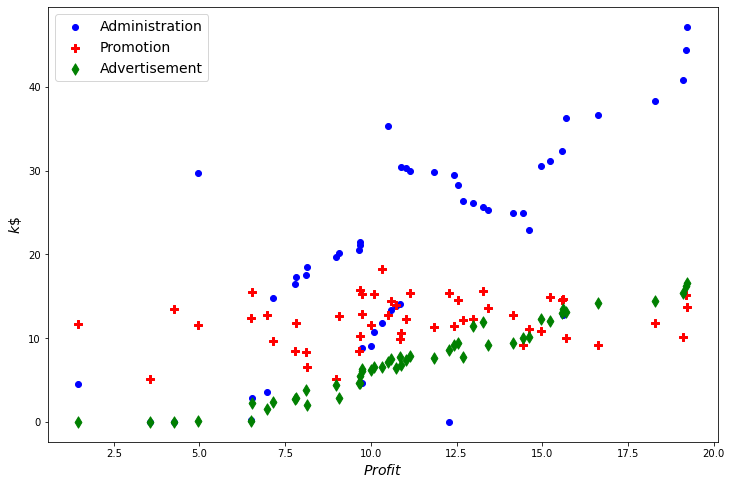

In [4]:
# showing the data in a plot
plt.figure(figsize=(12, 8))
plt.scatter(df.Profit.values, df['Administration Spend'].values, c='blue', label='Administration')
plt.scatter(df.Profit.values, df['Promotion Spend'].values, c='red', label='Promotion', marker='P', s=64)
plt.scatter(df.Profit.values, df['Advertisement Spend'].values, c='green', label='Advertisement', marker='d', s=64)

plt.xlabel('$Profit$', fontsize=14)
plt.ylabel('$k\$$', fontsize=14)
plt.legend(fontsize=14)

<AxesSubplot:>

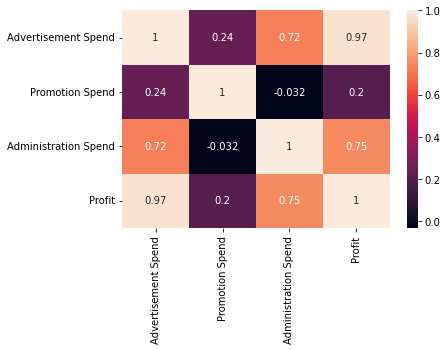

In [5]:
#finding the correlation numerical values
sns.heatmap(df[['Advertisement Spend', 'Promotion Spend',
                'Administration Spend', 'Profit']].corr(),annot=True)

<AxesSubplot:title={'center':'correlations of Profit with Spends by States'}, xlabel='State'>

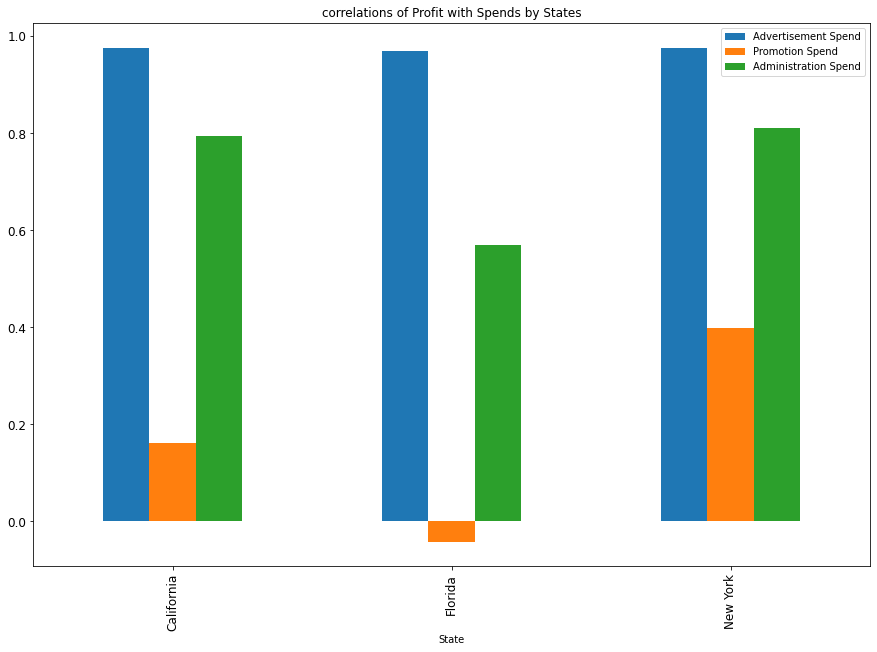

In [6]:
#correlation in different states
df.groupby('State').corr()[['Profit']].unstack(level=1)['Profit'][['Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar', title ="correlations of Profit with Spends by States", figsize=(15, 10), legend=True, fontsize=12)

In [7]:
#ignoring the state in rder to have our to compare data in a plot
dff=df.drop(["State"],axis=1)
dff.head()

,Advertisement Spend,Promotion Spend,Administration Spend,Profit
0,16.534920,13.689780,47.178410,19.226183
1,16.259770,15.137759,44.389853,19.179206
2,15.344151,10.114555,40.793454,19.105039
3,14.437241,11.867185,38.319962,18.290199
4,14.210734,9.139177,36.616842,16.618794


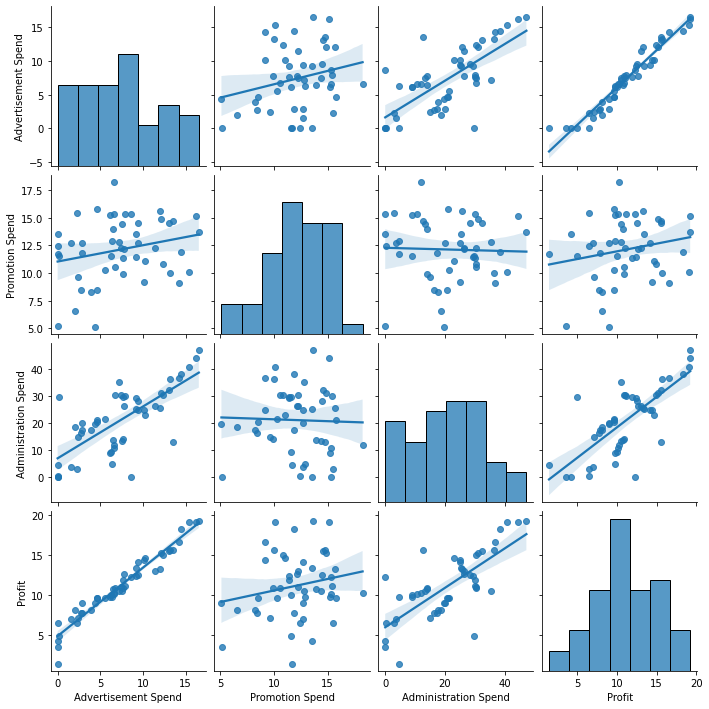

In [8]:
sns.pairplot(df,kind="reg");

In [9]:
#use KMeans clustering and choose the number of clusters
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(dff)
k_fit.n_clusters
k_fit.cluster_centers_
k_fit.labels_

array([2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 0, 1, 1, 1])

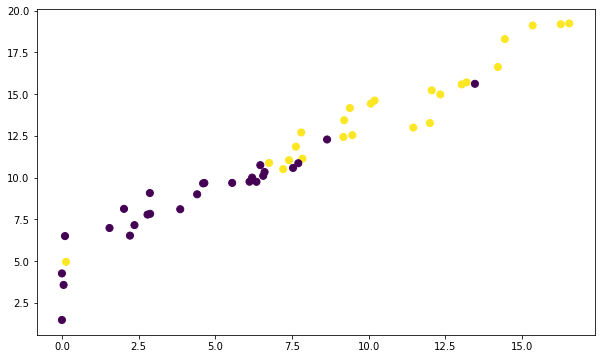

In [10]:
#Have Advertisement Spend and Profit data in a plot
plt.figure(figsize=(10,6))
kmeans=KMeans(n_clusters=2)
k_fit=kmeans.fit(dff)
clusters=k_fit.labels_
plt.scatter(dff.iloc[:,0],dff.iloc[:,3],c=clusters,s=50);

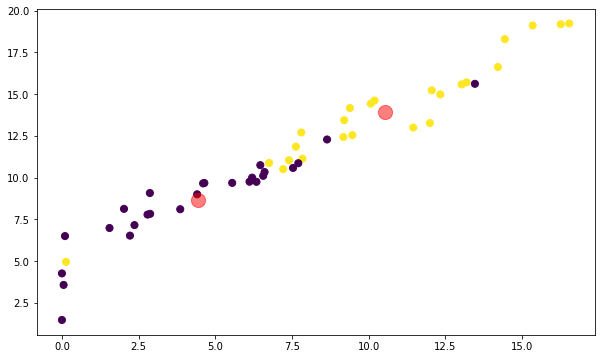

In [11]:
#dedicate a centroid for these data
plt.figure(figsize=(10,6))
centers=k_fit.cluster_centers_
plt.scatter(dff.iloc[:,0],dff.iloc[:,3],c=clusters,s=50);
plt.scatter(centers[:,0], centers[:,3],c="red", s=200, alpha=0.5);

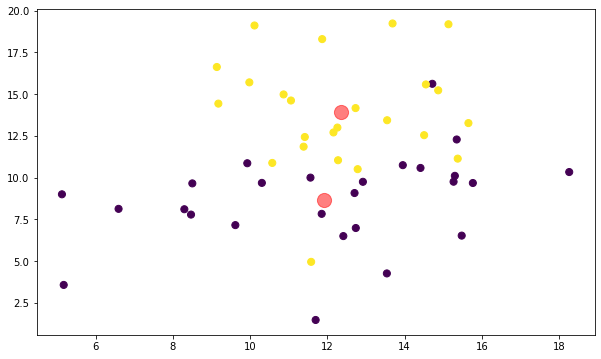

In [12]:
#dedicate a centroid for these data
plt.figure(figsize=(10,6))
centers=k_fit.cluster_centers_
plt.scatter(dff.iloc[:,1],dff.iloc[:,3],c=clusters,s=50);
plt.scatter(centers[:,1], centers[:,3],c="red", s=200, alpha=0.5);

In [13]:
#figure out the position of centroid
centers[:,1]

array([11.92282273, 12.36374196])

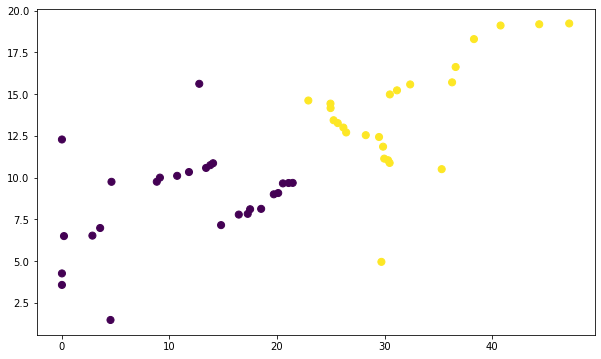

In [14]:
#Have Administration Spend and Profit data in a plot
plt.figure(figsize=(10,6))
plt.scatter(dff.iloc[:,2],dff.iloc[:,3],c=clusters,s=50);

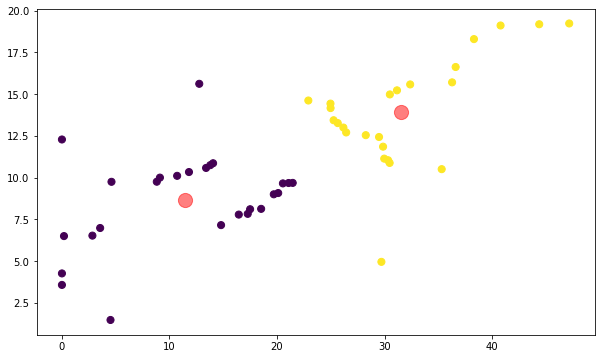

In [15]:
#dedicate a centroid for these data
plt.figure(figsize=(10,6))
centers=k_fit.cluster_centers_
plt.scatter(dff.iloc[:,2],dff.iloc[:,3],c=clusters,s=50);
plt.scatter(centers[:,2], centers[:,3],c="red", s=200, alpha=0.5);

In [16]:
#figure out the position of centroid
centers[:,2]

array([11.44849904, 31.56102142])

In [17]:
df["cluster_no"]=clusters
dff.head()

,Advertisement Spend,Promotion Spend,Administration Spend,Profit
0,16.534920,13.689780,47.178410,19.226183
1,16.259770,15.137759,44.389853,19.179206
2,15.344151,10.114555,40.793454,19.105039
3,14.437241,11.867185,38.319962,18.290199
4,14.210734,9.139177,36.616842,16.618794


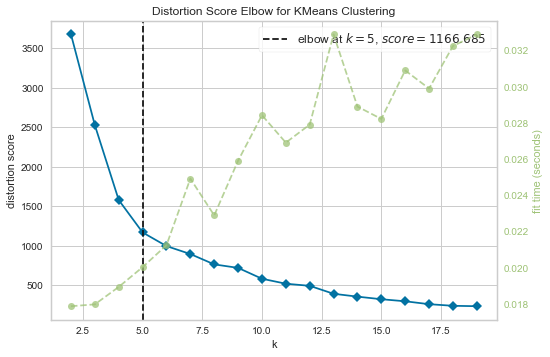

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#use Elbow for finding the best number of K
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,20))
visualizer.fit(dff)
visualizer.poof()